# 財政部北區國稅局 RPA 教育訓練

> Gooogle Colab: <https://bit.ly/3CJFYCG>

[數聚點](https://www.datainpoint.com) | 郭耀仁 <yaojenkuo@datainpoint.com>

```bash
!curl https://raw.githubusercontent.com/datainpoint/workshop-ntbt-gov-2023/main/dict.txt.big > dict.txt.big
!curl https://raw.githubusercontent.com/datainpoint/workshop-ntbt-gov-2023/main/userdict.txt > userdict.txt
!pip install transformers
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 什麼是機器學習

## 機器學習的三個要素、一個但書

> A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P if its performance at tasks in T, as measured by P, improves with experience E.

來源：[Machine Learning, Tom Mitchell, McGraw Hill, 1997](http://www.cs.cmu.edu/~tom/mlbook.html)

## 傳統透過電腦程式解決問題的方式示意圖

![Imgur](https://i.imgur.com/3pojPXW.png?1)

來源：<https://www.coursera.org/learn/introduction-tensorflow>

## 給定規則 $w$ 以及資料 $X$，我們就可以定義出函數 $f$ 生成答案 $y$

\begin{equation}
y = f(X;w) = Xw
\end{equation}

## 以機器學習的電腦程式解決問題的方式示意圖

![Imgur](https://i.imgur.com/YunyLd7.png)

來源：<https://www.coursera.org/learn/introduction-tensorflow>

## 給定答案 $y$ 以及資料 $X$，機器學習的電腦程式在最小化損失函數 $J$ 的前提下生成規則 $w$，進而獲得預測 $\hat{y}$

\begin{equation}
\text{choose} \; w \in \{w^1, w^2, ..., w^n\} \\
\text{where} \; w \; \text{minimizes} \; J(w) \\
\text{subject to} \; \hat{y} = h(X; w) = Xw \\
\text{where} \; J(w) \; \text{measures the loss between} \; y \; \text{and} \; \hat{y} \\
\end{equation}

## 預測數值時最常見的損失函數 $J$

最小化均方誤差（Mean squared error）。

\begin{align}
\operatorname*{arg\,min}_w \;  J(w) =  \frac{1}{m} \sum_i^m (y_i - \hat{y_i})^2
\end{align}

## 預測類別時最常見的損失函數 $J$

最小化預測錯誤個數。

\begin{align}
\operatorname*{arg\,min}_w \; J(w) = \sum_j n(E_j) \text{ where } E_j \; \text{represents the occurrence of } y_j \neq \hat{y_j}
\end{align}

## 機器學習的資料表達

## 特徵矩陣與目標陣列

- 外型 `(m, n)` 的特徵矩陣 $X$
- 外型 `(m,)` 的目標陣列 $y$

In [2]:
def plot_X_y():
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.axis('equal')
    # Draw features matrix
    ax.vlines(range(6), ymin=0, ymax=9, lw=1)
    ax.hlines(range(10), xmin=0, xmax=5, lw=1)
    font_prop = dict(size=12, family='monospace')
    ax.text(-1, -1, "Feature Matrix ($X$)", size=14)
    ax.text(0.1, -0.3, r'n_features $\longrightarrow$', **font_prop)
    ax.text(-0.1, 0.1, r'$\longleftarrow$ m_samples', rotation=90,
            va='top', ha='right', **font_prop)
    # Draw labels vector
    ax.vlines(range(8, 10), ymin=0, ymax=9, lw=1)
    ax.hlines(range(10), xmin=8, xmax=9, lw=1)
    ax.text(7, -1, "Target Array ($y$)", size=14)
    ax.text(7.9, 0.1, r'$\longleftarrow$ m_samples', rotation=90,
            va='top', ha='right', **font_prop)
    ax.set_ylim(10, -2)
    plt.show()

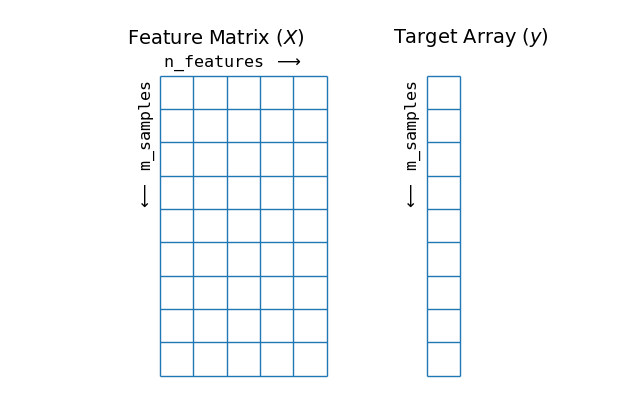

In [3]:
# 來源：<https://jakevdp.github.io/PythonDataScienceHandbook>
plot_X_y()

## 如何從 `DataFrame` 中擷取特徵矩陣與目標陣列

In [4]:
import pandas as pd

file_path = "111年新竹分局電子來文.xls" # upload before importing
electronic_official_doc = pd.read_excel(file_path) # import data
print(type(electronic_official_doc))
print(electronic_official_doc.shape)

<class 'pandas.core.frame.DataFrame'>
(107, 15)


In [5]:
electronic_official_doc.head()

,機關,收創文日期,來文方式,收創文文號,來文機關,來文字,來文號,主旨,公文性質,公文文別,簽呈方式,簽核方式,密等,承辦科室,
0,O44,1110103,電子來文,1112210002,財政部臺北國稅局,財北國稅內湖營業一,1101607997,貴公司110年12月31日至111年1月2日於新竹尼尼生活館(新竹市東區新安路2-1號)舉辦...,一般公文,函,空白,線上簽核,普通,新竹分局銷售稅課,
1,O44,1110103,電子來文,1112210003,財政部中區國稅局,中區國稅竹南銷售,1103355878,貴公司110年12月30日依加值型及非加值型營業稅法(以下簡稱營業稅法)第30條規定，申請變...,一般公文,函,空白,線上簽核,普通,新竹分局銷售稅課,
2,O44,1110103,電子來文,1112210004,財政部北區國稅局竹北分局,北區國稅竹北綜,1100310056,貴轄納稅義務人張○勇君對其109年度源自源明科技工程(有)公司之薪資所得持有疑義一案，復如說...,一般公文,函,空白,線上簽核,普通,新竹分局綜所稅課,
3,O44,1110104,電子來文,1112210006,財政部北區國稅局,北區國稅審二,1100015568,檢送109年度投資國外或大陸地區且持有投資公司股份比例為100%之公司、外國或大陸公司在臺分...,一般公文,函,空白,線上簽核,普通,新竹分局綜所稅課,
4,O44,1110104,電子來文,1112210007,新竹市政府,府產商,1100197212,本府110年12月22日府產商字第1100004569號函核准貴商業合夥人變更登記案，因合夥...,一般公文,函,空白,線上簽核,普通,新竹分局銷售稅課,


In [6]:
electronic_official_doc[electronic_official_doc["承辦科室"] == "新竹分局人事室"].head(3)

,機關,收創文日期,來文方式,收創文文號,來文機關,來文字,來文號,主旨,公文性質,公文文別,簽呈方式,簽核方式,密等,承辦科室,
28,O44,1110104,電子來文,1112210032,財政部北區國稅局,北區國稅人,1102021023,為維持本局為民服務品質，各單位於111年農曆春節連續假期前、後1日上班日，依業務需要，以現有...,一般公文,函,空白,線上簽核,普通,新竹分局人事室,
77,O44,1110104,電子來文,1112210092,新竹市選舉委員會,竹市選一,1103150443,110年全國性公民投票及新竹市地方性公民投票，業於110年12月18日完成投開票工作，感謝各...,一般公文,函,空白,線上簽核,普通,新竹分局人事室,
106,O44,1110104,電子來文,1112210124,財政部北區國稅局,北區國稅人,1111001629,為辦理本局暨所屬機關110年7月至12月職務代理名冊查考事宜，請於111年1月7日前依規定完...,一般公文,函,空白,線上簽核,普通,新竹分局人事室,


In [7]:
electronic_official_doc[electronic_official_doc["承辦科室"] == "新竹分局政風室"].head(3)

,機關,收創文日期,來文方式,收創文文號,來文機關,來文字,來文號,主旨,公文性質,公文文別,簽呈方式,簽核方式,密等,承辦科室,
38,O44,1110104,電子來文,1112210044,財政部北區國稅局政風室,北區國稅政室,1110000026,有關110年度公職人員財產申報實質審查及前後年度申報財產比對公開抽籤事宜，請依說明事項辦理，...,一般公文,書函,空白,線上簽核,普通,新竹分局政風室,
52,O44,1110104,電子來文,1112210063,新竹縣政府政風處,政查,1114710002,邀請貴單位參加本處111年度「政風查處業務教育訓練」，請查照。,一般公文,函,空白,線上簽核,普通,新竹分局政風室,
59,O44,1110104,電子來文,1112210070,財政部北區國稅局,北區國稅政,1110000060,檢送本局「110年度稽徵業務考核報告-稅務風紀項目」格式1份(如附件)，請依說明事項辦理，請查照。,一般公文,函,空白,線上簽核,普通,新竹分局政風室,


In [8]:
electronic_official_doc[electronic_official_doc["承辦科室"] == "新竹分局服務管理課"].head(3)

,機關,收創文日期,來文方式,收創文文號,來文機關,來文字,來文號,主旨,公文性質,公文文別,簽呈方式,簽核方式,密等,承辦科室,
5,O44,1110104,電子來文,1112210008,新竹市東區區公所,東行,1100020513,有關貴分局為辦理「110年度各類所得扣繳法令申報暨新修正營所稅法令及函釋講習會」，於111年...,一般公文,函,空白,線上簽核,普通,新竹分局服務管理課,
6,O44,1110104,電子來文,1112210009,臺灣新竹地方法院民事執行處,新院玉110司執莊16103,1104042310,本院定於111年2月15日下午2 時30分於民事執行處投標室進行投標、3 時整開標，就債務人...,一般公文,函,空白,線上簽核,普通,新竹分局服務管理課,
15,O44,1110104,電子來文,1112210018,新竹市稅務局,新市稅房,1100231958,有關貴公司坐落新竹市香山區海山里中華路六段１巷３號（稅籍編號：07170254105）房屋於...,一般公文,函,以稿代簽,紙本簽核,普通,新竹分局服務管理課,


In [9]:
electronic_official_doc[electronic_official_doc["承辦科室"] == "新竹分局營所遺贈稅課"].head(3)

,機關,收創文日期,來文方式,收創文文號,來文機關,來文字,來文號,主旨,公文性質,公文文別,簽呈方式,簽核方式,密等,承辦科室,
16,O44,1110104,電子來文,1112210019,交通部公路總局新竹區監理所新竹市監理站,竹監新站,1100394456,有關被繼承人劉芯瑜、王德輝、邱金來君違反道路交通管理事件一案，詳如說明，請查照。,一般公文,函,空白,線上簽核,普通,新竹分局營所遺贈稅課,
18,O44,1110104,電子來文,1112210021,交通部公路總局新竹區監理所新竹市監理站,竹監新站,1100393676,貴班小客車逕升大客車班第80610B期結業學員（張浩秦等13名）名冊，同意備查，復請查照。,一般公文,函,空白,線上簽核,普通,新竹分局營所遺贈稅課,
21,O44,1110104,電子來文,1112210024,交通部公路總局新竹區監理所新竹市監理站,竹監新站,1100393475,貴班大客、貨車班第20、30670A期結業學員（林志宇等13名）名冊，同意備查，復請查照。,一般公文,函,空白,線上簽核,普通,新竹分局營所遺贈稅課,


In [10]:
electronic_official_doc[electronic_official_doc["承辦科室"] == "新竹分局綜所稅課"].head(3)

,機關,收創文日期,來文方式,收創文文號,來文機關,來文字,來文號,主旨,公文性質,公文文別,簽呈方式,簽核方式,密等,承辦科室,
2,O44,1110103,電子來文,1112210004,財政部北區國稅局竹北分局,北區國稅竹北綜,1100310056,貴轄納稅義務人張○勇君對其109年度源自源明科技工程(有)公司之薪資所得持有疑義一案，復如說...,一般公文,函,空白,線上簽核,普通,新竹分局綜所稅課,
3,O44,1110104,電子來文,1112210006,財政部北區國稅局,北區國稅審二,1100015568,檢送109年度投資國外或大陸地區且持有投資公司股份比例為100%之公司、外國或大陸公司在臺分...,一般公文,函,空白,線上簽核,普通,新竹分局綜所稅課,
7,O44,1110104,電子來文,1112210010,財政部北區國稅局,北區國稅審二,1102021121,檢送臺北市110年11月1日至110年11月30日間之不動產交易資訊檔如附件，請查收運用。,一般公文,函,空白,線上簽核,普通,新竹分局綜所稅課,


In [11]:
electronic_official_doc[electronic_official_doc["承辦科室"] == "新竹分局銷售稅課"].head(3)

,機關,收創文日期,來文方式,收創文文號,來文機關,來文字,來文號,主旨,公文性質,公文文別,簽呈方式,簽核方式,密等,承辦科室,
0,O44,1110103,電子來文,1112210002,財政部臺北國稅局,財北國稅內湖營業一,1101607997,貴公司110年12月31日至111年1月2日於新竹尼尼生活館(新竹市東區新安路2-1號)舉辦...,一般公文,函,空白,線上簽核,普通,新竹分局銷售稅課,
1,O44,1110103,電子來文,1112210003,財政部中區國稅局,中區國稅竹南銷售,1103355878,貴公司110年12月30日依加值型及非加值型營業稅法(以下簡稱營業稅法)第30條規定，申請變...,一般公文,函,空白,線上簽核,普通,新竹分局銷售稅課,
4,O44,1110104,電子來文,1112210007,新竹市政府,府產商,1100197212,本府110年12月22日府產商字第1100004569號函核准貴商業合夥人變更登記案，因合夥...,一般公文,函,空白,線上簽核,普通,新竹分局銷售稅課,


In [12]:
X = electronic_official_doc[["來文機關", "主旨"]].values # select 2 columns
y = electronic_official_doc["承辦科室"].values          # select 1 column
print(X.shape)
print(y.shape)
print(electronic_official_doc["承辦科室"].nunique())
print(electronic_official_doc["承辦科室"].unique())

(107, 2)
(107,)
6
['新竹分局銷售稅課' '新竹分局綜所稅課' '新竹分局服務管理課' '新竹分局營所遺贈稅課' '新竹分局人事室' '新竹分局政風室']


In [13]:
print(X[:5])
print(y[:5])

[['財政部臺北國稅局'
  '貴公司110年12月31日至111年1月2日於新竹尼尼生活館(新竹市東區新安路2-1號)舉辦短期商品展售活動乙案，同意備查，請查照。']
 ['財政部中區國稅局'
  '貴公司110年12月30日依加值型及非加值型營業稅法(以下簡稱營業稅法)第30條規定，申請變更營業所在地址登記一案，稅務部分准予辦理，請查照。']
 ['財政部北區國稅局竹北分局' '貴轄納稅義務人張○勇君對其109年度源自源明科技工程(有)公司之薪資所得持有疑義一案，復如說明二，請查照。']
 ['財政部北區國稅局'
  '檢送109年度投資國外或大陸地區且持有投資公司股份比例為100%之公司、外國或大陸公司在臺分公司清冊各1份，請依說明事項辦理，請查照。']
 ['新竹市政府'
  '本府110年12月22日府產商字第1100004569號函核准貴商業合夥人變更登記案，因合夥人誤繕，特此更正，茲附登記抄本，請查照。']]
['新竹分局銷售稅課' '新竹分局銷售稅課' '新竹分局綜所稅課' '新竹分局綜所稅課' '新竹分局銷售稅課']


## 什麼是模型

- 模型（Model）是一個類似於「函數」的概念，由參數與運算組成。
- 模型的參數以及運算可以透過不同的方式生成，生成方式包含規則敘述與歷史資料訓練。
    - 透過規則敘述生成參數以及運算，稱為基於規則的模型（Rule-based model）或稱專家模型。
    - 透過歷史資料訓練生成參數以及運算，稱為基於演算法的模型（Algorithm-based model）或稱基於機器學習的模型。
- 不同模型除了相互比較，也可以與基準（Baseline）模型比較，常用來作為基準模型的像是基於隨機的黑猩猩模型或稱虛假模型（Dummy model），像是以投擲硬幣、骰子或者射飛鏢來決定模型的輸出。

## 可以採用哪種模型解決問題

- 採用基於規則的模型：
    - 問題能用人類語言描述邏輯、撰寫規則。
    - 答案不能容忍誤差。
- 採用基於機器學習的模型：
    - 問題非領域專家不容易描述邏輯、撰寫規則。
    - 答案能夠容忍誤差。

## 可以採用哪種模型解決問題（續）

- 採用基於規則的模型：給定整數判斷它是否為奇數、偶數或者質數；給定一份電子公文的「主旨」所出現之關鍵字判斷「承辦科室」。
- 採用基於機器學習的模型：給定一份電子公文的「來文機關」以及「主旨」來猜「承辦科室」為新竹分局銷售稅課、新竹分局綜所稅課、新竹分局服務管理課、新竹分局營所遺贈稅課、新竹分局人事室或新竹分局政風室。

## 基於機器學習的模型可再分為

- 監督式學習：訓練資料中具備已實現的數值或標籤。
    - 迴歸：數值預測的任務。
    - 分類：類別預測的任務。
- 非監督式學習：訓練資料中「不」具備已實現的數值或標籤。

## 數值預測的任務：迴歸模型

- 「數值預測」是「監督式學習」的其中一種應用類型。
- 預測的目標向量 $y$ 屬於連續型數值變數。
- 更常被稱為「迴歸模型」。

## 預測數值時最常見的損失函數 $J$

最小化訓練資料的均方誤差（Mean squared error）。

\begin{align}
\operatorname*{arg\,min}_w \;  J(w) =  \frac{1}{m} \sum_i^m (y_i^{(train)} - \hat{y_i}^{(train)})^2
\end{align}

## 評估模型：驗證資料與預測資料的均方誤差

\begin{equation}
\text{MSE}_{valid} = \frac{1}{m}\sum_{i}^{m}{(y^{(valid)}_i - \hat{y_i}^{(valid)})^2}
\end{equation}

## 類別預測的任務：分類器

- 「類別預測」是「監督式學習」的其中一種應用類型。
- 預測的目標向量 $y$ 屬於離散型的類別變數。
- 更常被稱為「分類器」。

## 預測類別時最常見的損失函數 $J$

最小化訓練資料的誤分類數。

\begin{align}
\operatorname*{arg\,min}_w \; J(w) = \sum_j n(E^{(train)}_j) \text{ where } E^{(train)}_j \; \text{represents the occurrence of } y^{(train)}_j \neq \hat{y^{(train)}_j}
\end{align}

## 預測電子公文的承辦科室

- 資料（Experience）：一定數量電子公文的「來文機關」與「主旨」。
- 任務（Task）：利用模型預測電子公文的「承辦科室」。
- 評估（Performance）：模型預測的「承辦科室」與實際「承辦科室」的誤分類數。
- 但書（Condition）：隨著資料觀測值筆數增加，預測誤分類數應該要減少。

## 什麼是深度學習

## 無法描述規則的任務

- 像是影像分類、語音識別或機器翻譯等，都屬於無法描述規則的任務。
- 對人類來說影像分類、語音識別或語言翻譯是很輕易能辦到的，但要寫出其中的規則、邏輯是極其困難的。

## 該如何處理無法描述規則的任務

- 以機器學習領域的一個分支**深度學習**來處理。
- 深度學習是一種不需要使用者**直接**決定特徵的最適化方法，而是由深度學習的結構**間接**決定。
    - 面對數值或類別的預測任務，若是採用機器學習，係數**直接**由特徵矩陣 $X$ 的欄位個數決定。
    - 面對數值或類別的預測任務，若是採用深度學習，係數會改由深度（Depth）、或者稱為層數（Number of layers）決定。

## 深度學習

- 以集合概念來說明的話，深度學習包含於機器學習之中，是機器學習集合的子集合。
- 深度學習使用連續且多層的數值轉換從訓練資料中同時進行特徵工程（Feature engineering）以及係數 $w$ 的最適化。
- 簡言之，我們可以將深度學習視為一種不需要使用者直接進行「特徵工程」（Feature engineering）的最適化方法，使用者透過定義層數來間接決定特徵工程的規模，當深度學習的層數愈多、單位愈多，意味著特徵工程的規模愈大。

## 現代的基礎深度學習模型

- 基礎深度學習模型由充滿單位（又稱神經元，Neuron）的層數堆疊而成，每層的多個單位會因為目的性而有不同的相連狀態。
- 把結構中某一層的所有單位都與前一層以及後一層的所有單位相連，稱為完全連接層（Fully-connected layers）或密集層（Dense layers）。
- 深度學習模型具備了層數的結構，模型 $h$ 也成為了有鏈結的關係、係數 $W$ 也成為矩陣外型，而非前述的向量外型。

\begin{align}
\hat{y} &= h(X; W) \\
&= h^{(n)}(X;w^{(n)}...(h^{(2)}(X; w^{(2)};(h^{(1)}(X; w^{(1)})))))
\end{align}

## 現代的基礎深度學習模型（續）

- 其中 $h^{(1)}$ 稱為「輸入層」（Input layer），$ h^{(n)}$ 稱為「輸出層」（Output layer），介於這兩層之間的 $h^{(i)}$ 則稱為「隱藏層」（Hidden layer）。
- 深度學習模型與傳統機器學習模型最大的差別，在於是否有隱藏層的存在，意即一個最基本、最淺的深度學習模型至少具有三層。

\begin{align}
\hat{y} &= h(X; W) \\
&= h^{(3)}(X; w^{(3)}(h^{(2)}(X; w^{(2)}(h^{(1)}(X; w^{(1)})))))
\end{align}

## 尋找係數的演算方法

- 在機器學習中廣泛使用的演算方法稱為「梯度遞減」（Gradient descent）。
- 基本概念是先隨機初始化一組係數向量，在基於降低 $y^{(train)}$ 與 $\hat{y}^{(train)}$ 之間誤差 $J(w)$ 之目標之下，以迭代方式更新該組係數向量，一直到 $J(w)$ 收斂到局部最小值為止。

## 機器學習與梯度遞減

- 更新係數向量時，並不是盲目亂槍打鳥地試誤（Trial and error）
- 根據誤差 $J(w)$ 關於係數向量 $w$ 的偏微分來決定更新的方向性，而更新的幅度大小則由一個大於零、稱為「學習速率」的常數 $\alpha$ 決定：

\begin{equation}
w := w - \alpha \frac{\partial J}{\partial w}
\end{equation}

## 深度學習模型與反向傳播

- 隱藏層的存在造就了尋找深度學習模型最適的 $W$ 時，跟機器學習的「梯度遞減」有異曲同工的地方。
- 同工：
    - 起始隨機初始化的 $W$ 所預測目標向量 $\hat{y}$ 會與實際目標向量 $y$ 相差甚遠，兩者之間的誤差也會很大。
- 異曲：
    - 透過「反向傳播」（Backpropagation）的演算方法來進行梯度遞減、微調每層的係數。
    - 因為深度學習模型中至少有一個「隱藏層」的存在，導致 $\hat{y}$ 與 $y$ 之間的誤差僅能回饋到前一個隱藏層與輸出層之間的 $W$ 作為更新依據。
    - 更前段層數之間 $W$ 的更新依據，則改由後段層數回饋。
- 簡言之，我們可以將「反向傳播」類比為專門設計給深度學習模型的梯度遞減演算方法。

## 如何建立文字分類模型

## 建立文字分類模型的標準步驟

1. 準備欲訓練預測的特徵矩陣 $X$  與目標陣列 $y$
2. 對特徵矩陣 $X$ 與目標陣列 $y$ 進行特徵工程。
3. 對特徵矩陣 $X$ 進行文字編碼。
4. 切割訓練與驗證資料。
5. 建立預測器類別的物件。
6. 將訓練特徵矩陣 $X^{train}$ 與目標陣列 $y^{train}$ 輸入 `predictor.fit()`
7. 將驗證特徵矩陣 $X^{valid}$ 輸入 `predictor.predict()` 獲得 $\hat{y}^{valid}$
8. 比對 $\hat{y}^{valid}$ 與 $y^{valid}$ 之間的差異

## 承辦科室有 6 個不同的類別

In [14]:
print(electronic_official_doc["承辦科室"].unique())
print(electronic_official_doc["承辦科室"].nunique())
print(electronic_official_doc["承辦科室"].value_counts())

['新竹分局銷售稅課' '新竹分局綜所稅課' '新竹分局服務管理課' '新竹分局營所遺贈稅課' '新竹分局人事室' '新竹分局政風室']
6
新竹分局銷售稅課      39
新竹分局綜所稅課      30
新竹分局服務管理課     23
新竹分局營所遺贈稅課     7
新竹分局政風室        5
新竹分局人事室        3
Name: 承辦科室, dtype: int64


## 準備欲訓練預測的特徵矩陣 $X$  與目標陣列 $y$

In [15]:
X = electronic_official_doc[["來文機關", "主旨"]].values
y = electronic_official_doc["承辦科室"].values
print(X[:5])
print(np.unique(y, return_counts=True))

[['財政部臺北國稅局'
  '貴公司110年12月31日至111年1月2日於新竹尼尼生活館(新竹市東區新安路2-1號)舉辦短期商品展售活動乙案，同意備查，請查照。']
 ['財政部中區國稅局'
  '貴公司110年12月30日依加值型及非加值型營業稅法(以下簡稱營業稅法)第30條規定，申請變更營業所在地址登記一案，稅務部分准予辦理，請查照。']
 ['財政部北區國稅局竹北分局' '貴轄納稅義務人張○勇君對其109年度源自源明科技工程(有)公司之薪資所得持有疑義一案，復如說明二，請查照。']
 ['財政部北區國稅局'
  '檢送109年度投資國外或大陸地區且持有投資公司股份比例為100%之公司、外國或大陸公司在臺分公司清冊各1份，請依說明事項辦理，請查照。']
 ['新竹市政府'
  '本府110年12月22日府產商字第1100004569號函核准貴商業合夥人變更登記案，因合夥人誤繕，特此更正，茲附登記抄本，請查照。']]
(array(['新竹分局人事室', '新竹分局政風室', '新竹分局服務管理課', '新竹分局營所遺贈稅課', '新竹分局綜所稅課',
       '新竹分局銷售稅課'], dtype=object), array([ 3,  5, 23,  7, 30, 39]))


## 對特徵矩陣 $X$  與目標陣列 $y$ 進行特徵工程

In [16]:
mapping_dict = {
    "新竹分局銷售稅課": "銷售",
    "新竹分局綜所稅課": "綜合所得",
    "新竹分局服務管理課": "服務管理",
    "新竹分局營所遺贈稅課": "營業所得遺產贈與",
    "新竹分局政風室": "政風",
    "新竹分局人事室": "人事"
}
y = electronic_official_doc["承辦科室"].map(mapping_dict).values
np.unique(y, return_counts=True)

(array(['人事', '政風', '服務管理', '營業所得遺產贈與', '綜合所得', '銷售'], dtype=object),
 array([ 3,  5, 23,  7, 30, 39]))

## 什麼是自然語言處理

自然語言處理（Natural Language Processing, NLP）的目標是使得電腦能夠理解自然語言，進而完成一些特定任務，例如：拼字檢查、解析資訊以及語意分析等。

## 常見的自然語言處理任務

- 關鍵字搜尋。
- 同義字詞搜尋。
- 機器翻譯。
- 語意分析。
- 問答系統。
- ...等。

## 自然語言處理任務的基礎

- 分詞分句。
- 詞性標注。
- 關鍵詞擷取。
- 命名實體辨識（Named-Entity Recognition, NER）。

## 依據語言選擇 Python 自然語言處理模組

- 英文：`nltk`
- 中文：`jieba`
- 多語系：`polyglot`

## 關於 `nltk`

Natural Language Toolkit 是 Python 最好的英文自然語言處理模組，功能涵蓋了分類、分詞、詞幹提取與詞性標註等。

來源：<https://www.nltk.org>

## 關於 `jieba`

「结巴」中文分詞：做最好的 Python 中文分詞模組。

來源：<https://github.com/fxsjy/jieba>

## 關於 `polyglot`

支援多語系的 Python 分詞、命名實體辨識模組。

來源：<https://polyglot.readthedocs.io/en/latest>

In [17]:
for title in X[:, 1].ravel()[:5]:
    print(title)

貴公司110年12月31日至111年1月2日於新竹尼尼生活館(新竹市東區新安路2-1號)舉辦短期商品展售活動乙案，同意備查，請查照。
貴公司110年12月30日依加值型及非加值型營業稅法(以下簡稱營業稅法)第30條規定，申請變更營業所在地址登記一案，稅務部分准予辦理，請查照。
貴轄納稅義務人張○勇君對其109年度源自源明科技工程(有)公司之薪資所得持有疑義一案，復如說明二，請查照。
檢送109年度投資國外或大陸地區且持有投資公司股份比例為100%之公司、外國或大陸公司在臺分公司清冊各1份，請依說明事項辦理，請查照。
本府110年12月22日府產商字第1100004569號函核准貴商業合夥人變更登記案，因合夥人誤繕，特此更正，茲附登記抄本，請查照。


## 使用 `jieba` 進行特徵工程：分詞

In [18]:
import jieba

for title in X[:, 1].ravel()[:5]:
    list_cut = jieba.lcut(title)
    print(list_cut)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/0b/r__z5mpn6ldgb_w2j7_y_ntr0000gn/T/jieba.cache
Loading model cost 0.832 seconds.
Prefix dict has been built successfully.


['貴', '公司', '110', '年', '12', '月', '31', '日至', '111', '年', '1', '月', '2', '日', '於', '新竹', '尼尼', '生活', '館', '(', '新竹市', '東區', '新安', '路', '2', '-', '1', '號', ')', '舉辦', '短期', '商品', '展售', '活動', '乙案', '，', '同意', '備查', '，', '請', '查照', '。']
['貴', '公司', '110', '年', '12', '月', '30', '日依', '加值', '型', '及', '非', '加值', '型', '營業', '稅法', '(', '以下', '簡稱', '營業', '稅法', ')', '第', '30', '條規定', '，', '申請', '變', '更', '營業', '所在', '地址', '登記', '一案', '，', '稅務', '部分', '准予', '辦理', '，', '請', '查照', '。']
['貴轄納', '稅義務人', '張', '○', '勇君', '對', '其', '109', '年度', '源自', '源明', '科技', '工程', '(', '有', ')', '公司', '之薪資', '所得', '持有', '疑義', '一案', '，', '復', '如', '說', '明二', '，', '請', '查照', '。']
['檢送', '109', '年度', '投資國外', '或', '大陸', '地區且', '持有', '投資', '公司', '股份', '比例', '為', '100%', '之', '公司', '、', '外國', '或', '大陸', '公司', '在', '臺', '分公司', '清冊', '各', '1', '份', '，', '請', '依說', '明事項', '辦理', '，', '請', '查照', '。']
['本府', '110', '年', '12', '月', '22', '日府', '產商字', '第', '1100004569', '號函', '核准', '貴商業', '合夥人', '變', '更', '登記案', '，', '因', '合夥人',

## 使用 `jieba` 進行特徵工程：設定詞典並分詞

In [19]:
jieba.set_dictionary("dict.txt.big") # 設定詞典
for title in X[:, 1].ravel()[:5]:
    list_cut = jieba.lcut(title)
    print(list_cut)

Building prefix dict from /Users/kuoyaojen/workshop-ntbt-gov-2023/dict.txt.big ...
Loading model from cache /var/folders/0b/r__z5mpn6ldgb_w2j7_y_ntr0000gn/T/jieba.u5a2c6960edf53eb8a497ddd98b238f26.cache
Loading model cost 2.252 seconds.
Prefix dict has been built successfully.


['貴', '公司', '110', '年', '12', '月', '31', '日至', '111', '年', '1', '月', '2', '日', '於', '新竹', '尼尼', '生活館', '(', '新竹市', '東區', '新安', '路', '2', '-', '1', '號', ')', '舉辦', '短期', '商品', '展售', '活動', '乙案', '，', '同意', '備查', '，', '請', '查照', '。']
['貴', '公司', '110', '年', '12', '月', '30', '日依', '加值', '型', '及', '非', '加值', '型', '營業稅', '法', '(', '以下', '簡稱', '營業稅', '法', ')', '第', '30', '條規', '定', '，', '申請', '變更', '營業所', '在', '地址', '登記', '一案', '，', '稅務', '部分', '准予', '辦理', '，', '請', '查照', '。']
['貴轄', '納稅', '義務人', '張', '○', '勇君', '對', '其', '109', '年度', '源自', '源明', '科技', '工程', '(', '有', ')', '公司', '之', '薪資', '所得', '持有', '疑義', '一案', '，', '復', '如', '說明', '二', '，', '請', '查照', '。']
['檢送', '109', '年度', '投資', '國外', '或', '大陸', '地區', '且', '持有', '投資', '公司', '股份', '比例', '為', '100%', '之', '公司', '、', '外國', '或', '大陸', '公司', '在', '臺', '分公司', '清冊', '各', '1', '份', '，', '請', '依', '說明', '事項', '辦理', '，', '請', '查照', '。']
['本府', '110', '年', '12', '月', '22', '日府', '產商字', '第', '1100004569', '號函', '核准', '貴', '商業', '合夥人', '變更', '登記', '

## 使用 `jieba` 進行特徵工程：設定詞典、新增詞典並分詞

In [20]:
jieba.load_userdict("userdict.txt")  # 新增詞典
for title in X[:, 1].ravel()[:5]:
    list_cut = jieba.lcut(title)
    print(list_cut)

['貴', '公司', '110', '年', '12', '月', '31', '日至', '111', '年', '1', '月', '2', '日', '於', '新竹', '尼尼生活館', '(', '新竹市', '東區', '新安', '路', '2', '-', '1', '號', ')', '舉辦', '短期', '商品', '展售', '活動', '乙案', '，', '同意', '備查', '，', '請', '查照', '。']
['貴', '公司', '110', '年', '12', '月', '30', '日依', '加值', '型', '及', '非', '加值', '型', '營業稅', '法', '(', '以下', '簡稱', '營業稅', '法', ')', '第', '30', '條規', '定', '，', '申請', '變更', '營業所', '在', '地址', '登記', '一案', '，', '稅務', '部分', '准予', '辦理', '，', '請', '查照', '。']
['貴轄', '納稅', '義務人', '張', '○', '勇君', '對', '其', '109', '年度', '源自', '源明', '科技', '工程', '(', '有', ')', '公司', '之', '薪資', '所得', '持有', '疑義', '一案', '，', '復', '如', '說明', '二', '，', '請', '查照', '。']
['檢送', '109', '年度', '投資', '國外', '或', '大陸', '地區', '且', '持有', '投資', '公司', '股份', '比例', '為', '100%', '之', '公司', '、', '外國', '或', '大陸', '公司', '在', '臺', '分公司', '清冊', '各', '1', '份', '，', '請', '依', '說明', '事項', '辦理', '，', '請', '查照', '。']
['本府', '110', '年', '12', '月', '22', '日府', '產商字', '第', '1100004569', '號函', '核准', '貴', '商業', '合夥人', '變更', '登記', '案', 

## 使用 `jieba` 進行特徵工程：詞性標注

In [21]:
import jieba.posseg as pseg

words = pseg.cut(X[0, 1])
for word, flag in words:
    print({flag: word})

{'a': '貴'}
{'n': '公司'}
{'m': '110'}
{'m': '年'}
{'m': '12'}
{'m': '月'}
{'m': '31'}
{'m': '日'}
{'p': '至'}
{'m': '111'}
{'m': '年'}
{'m': '1'}
{'m': '月'}
{'m': '2'}
{'m': '日'}
{'nr': '於'}
{'ns': '新竹'}
{'x': '尼尼生活館'}
{'x': '('}
{'ns': '新竹市'}
{'ns': '東區'}
{'ns': '新安'}
{'n': '路'}
{'m': '2'}
{'x': '-'}
{'m': '1'}
{'m': '號'}
{'x': ')'}
{'v': '舉辦'}
{'b': '短期'}
{'n': '商品'}
{'v': '展售'}
{'vn': '活動'}
{'n': '乙案'}
{'x': '，'}
{'d': '同意'}
{'vn': '備查'}
{'x': '，'}
{'zg': '請'}
{'v': '查照'}
{'x': '。'}


## 詞性列表

專有名詞類別標籤：

- PER 人名
- LOC 地名
- ORG 機構
- TIME 時間

來源：<https://github.com/fxsjy/jieba>

## 詞性列表（續）

一般名詞類別標籤：

來源：<https://github.com/fxsjy/jieba>

## 關鍵詞擷取

- TF-IDF 關鍵詞演算法（Term Frequency-Inverse Document Frequency Algorithm）。
- 某個詞在一篇文章中出現的頻率高，且在其他文章中很少出現，那麼該詞為具代表性的關鍵詞。

In [22]:
import jieba.analyse

for title in X[:, 1].ravel()[:5]:
    tags = jieba.analyse.extract_tags(title, 10)
    print(list(tags))

['查照', '110', '12', '31', '111', '尼尼生活館', '東區', '舉辦', '展售', '活動']
['30', '加值', '營業稅', '查照', '110', '12', '日依', '簡稱', '條規', '申請']
['查照', '貴轄', '納稅', '義務人', '勇君', '109', '源明', '薪資', '疑義', '說明']
['投資', '大陸', '查照', '檢送', '109', '國外', '地區', '100%', '外國', '清冊']
['合夥人', '登記', '查照', '110', '12', '22', '日府', '產商字', '1100004569', '號函']


## 依據詞性標注結果移除數量詞（m）之後再進行關鍵詞擷取

- TF-IDF 關鍵詞演算法（Term Frequency-Inverse Document Frequency Algorithm）。
- 某個詞在一篇文章中出現的頻率高，且在其他文章中很少出現，那麼該詞為具代表性的關鍵詞。

In [23]:
for title in X[:, 1].ravel()[:5]:
    words = pseg.cut(title)
    title_removed_m = ""
    for word, flag in words:
        if flag != "m":
            title_removed_m += word
    tags = jieba.analyse.extract_tags(title_removed_m, 10)
    print(list(tags))

['查照', '至於', '尼尼生活館', '東區', '舉辦', '展售', '活動', '乙案', '備查', '新竹市']
['加值', '營業稅', '查照', '簡稱', '條規', '申請', '變更', '營業所', '登記', '稅務']
['查照', '貴轄', '納稅', '義務人', '勇君', '源明', '薪資', '疑義', '說明', '源自']
['投資', '大陸', '查照', '檢送', '國外', '地區', '外國', '清冊', '各份', '說明']
['合夥人', '登記', '查照', '日府', '產商字', '商業', '變更', '誤繕', '本府', '更正']


In [24]:
titles_in_tags = []
for title in X[:, 1].ravel():
    words = pseg.cut(title)
    title_removed_m = ""
    for word, flag in words:
        if flag != "m":
            title_removed_m += word
    tags = jieba.analyse.extract_tags(title_removed_m, 10)
    join_tags = " ".join(tags)
    titles_in_tags.append(join_tags)
print(titles_in_tags[:5])

['查照 至於 尼尼生活館 東區 舉辦 展售 活動 乙案 備查 新竹市', '加值 營業稅 查照 簡稱 條規 申請 變更 營業所 登記 稅務', '查照 貴轄 納稅 義務人 勇君 源明 薪資 疑義 說明 源自', '投資 大陸 查照 檢送 國外 地區 外國 清冊 各份 說明', '合夥人 登記 查照 日府 產商字 商業 變更 誤繕 本府 更正']


## 關鍵詞再加入來文機關

In [25]:
orgs_titles_in_tags = []
orgs = electronic_official_doc["來文機關"].values
for title, org in zip(X[:, 1].ravel(), orgs):
    words = pseg.cut(title)
    title_removed_m = ""
    for word, flag in words:
        if flag != "m":
            title_removed_m += word
    tags = jieba.analyse.extract_tags(title_removed_m, 10)
    join_tags = " ".join(tags)
    org_str = f"{org} "
    org_join_tags = org_str + join_tags
    orgs_titles_in_tags.append(org_join_tags)
print(orgs_titles_in_tags[:5])

['財政部臺北國稅局 查照 至於 尼尼生活館 東區 舉辦 展售 活動 乙案 備查 新竹市', '財政部中區國稅局 加值 營業稅 查照 簡稱 條規 申請 變更 營業所 登記 稅務', '財政部北區國稅局竹北分局 查照 貴轄 納稅 義務人 勇君 源明 薪資 疑義 說明 源自', '財政部北區國稅局 投資 大陸 查照 檢送 國外 地區 外國 清冊 各份 說明', '新竹市政府 合夥人 登記 查照 日府 產商字 商業 變更 誤繕 本府 更正']


## 對特徵矩陣 $X$ 進行文字編碼：文字無法計算，數值才能計算

- Bag of Words
- TF-IDF（Term Frequency Inverse Document Frequency）
- Word2Vector
- BERT

## 轉換器與預測器是 Scikit-Learn 所創造最重要的兩種類別

1. 轉換器（Transformers）：用來預處理資料。
2. 預測器（Predictors）：用來訓練模型、生成規則 $w$

## 使用 Scikit-Learn 模組的轉換器進行 Bag of Words 文字編碼

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words="english")
X_org_title = cv.fit_transform(orgs_titles_in_tags)
print(X_org_title.toarray().shape)
print(X_org_title.toarray()[:5, :])

(107, 464)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## 使用 Scikit-Learn 模組的轉換器進行 TF-IDF 文字編碼

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words="english")
X_org_title = tfidf.fit_transform(orgs_titles_in_tags)
print(X_org_title.toarray().shape)
print(X_org_title.toarray()[:5, :])

(107, 464)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 切割訓練與驗證資料

- 訓練資料：具有實際值或標籤的已實現歷史資料。
- 驗證資料：具有實際值或標籤的已實現歷史資料，但是在使用上偽裝成不具有實際值或標籤的待預測資料。
- 使用 `sklearn.model_selection` 的 `train_test_split()` 函數。
    - `test_size` 驗證資料比例。
    - `random_state` 觀測值洗牌的隨機種子。

In [28]:
from sklearn.model_selection import train_test_split

X_org_title = cv.fit_transform(orgs_titles_in_tags)
y = electronic_official_doc["承辦科室"].map(mapping_dict).values
X_train, X_valid, y_train, y_valid = train_test_split(X_org_title, y, test_size=0.3, random_state=42) 

## 建立預測器類別的物件、將訓練特徵矩陣 $X^{train}$ 與目標陣列 $y^{train}$ 輸入 `predictor.fit()`

以支援向量機為例。

In [29]:
from sklearn.svm import SVC

svc_clf = SVC(kernel="linear")
svc_clf.fit(X_train, y_train)

SVC(kernel='linear')

## 將驗證特徵矩陣 $X^{valid}$ 輸入 `predictor.predict()` 獲得 $\hat{y}^{valid}$

In [30]:
y_hat = svc_clf.predict(X_valid)

## 比對 $\hat{y}^{valid}$ 與 $y^{valid}$ 之間的差異

In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid, y_hat)
y_labels = np.sort(np.unique(y_valid))
df_cm = pd.DataFrame(cm, index=y_labels+"true", columns=y_labels+"pred")
df_cm

,人事pred,服務管理pred,營業所得遺產贈與pred,綜合所得pred,銷售pred
人事true,0,1,0,0,0
服務管理true,0,3,0,2,0
營業所得遺產贈與true,0,2,1,1,0
綜合所得true,0,0,0,4,2
銷售true,0,0,0,1,16


## 建立預測器類別的物件、將訓練特徵矩陣 $X^{train}$ 與目標陣列 $y^{train}$ 輸入 `predictor.fit()`

以羅吉斯回歸為例。

In [32]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

LogisticRegression()

## 將驗證特徵矩陣 $X^{valid}$ 輸入 `predictor.predict()` 獲得 $\hat{y}^{valid}$

In [33]:
y_hat = lr_clf.predict(X_valid)

## 比對 $\hat{y}^{valid}$ 與 $y^{valid}$ 之間的差異

In [34]:
cm = confusion_matrix(y_valid, y_hat)
y_labels = np.sort(np.unique(y_valid))
df_cm = pd.DataFrame(cm, index=y_labels+"true", columns=y_labels+"pred")
df_cm

,人事pred,服務管理pred,營業所得遺產贈與pred,綜合所得pred,銷售pred
人事true,0,1,0,0,0
服務管理true,0,3,0,2,0
營業所得遺產贈與true,0,2,1,1,0
綜合所得true,0,0,0,4,2
銷售true,0,0,0,1,16


## 建立預測器類別的物件、將訓練特徵矩陣 $X^{train}$ 與目標陣列 $y^{train}$ 輸入 `predictor.fit()`

- 以樸素貝氏分類器為例。
- 基於條件機率的分類方法，特別適合文字分類任務。
    - 例如「主旨」有出現「投資」承辦科室為「新竹分局綜所稅課」的機率？「主旨」有出現「投資」以及「不動產」承辦科室為「新竹分局綜所稅課」的機率會增加為？
    - 例如「來文機關」有出現「監理站」承辦科室為「新竹分局營所遺贈稅課」的機率？「來文機關」有出現「監理站」以及「主旨」有出現「道路」承辦科室為「新竹分局營所遺贈稅課」的機率會增加為？

In [35]:
from sklearn.naive_bayes import MultinomialNB

nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)

MultinomialNB()

## 將驗證特徵矩陣 $X^{valid}$ 輸入 `predictor.predict()` 獲得 $\hat{y}^{valid}$

In [36]:
y_hat = nb_clf.predict(X_valid)

## 比對 $\hat{y}^{valid}$ 與 $y^{valid}$ 之間的差異

In [37]:
cm = confusion_matrix(y_valid, y_hat)
y_labels = np.sort(np.unique(y_valid))
df_cm = pd.DataFrame(cm, index=y_labels+"true", columns=y_labels+"pred")
df_cm

,人事pred,服務管理pred,營業所得遺產贈與pred,綜合所得pred,銷售pred
人事true,0,1,0,0,0
服務管理true,0,3,0,2,0
營業所得遺產贈與true,0,2,1,1,0
綜合所得true,0,0,0,6,0
銷售true,0,0,0,1,16


## 使用 `pickle` 儲存模型

In [38]:
import pickle

s = pickle.dumps(nb_clf)
another_nb_clf = pickle.loads(s)
another_nb_clf.predict(X_valid)

array(['綜合所得', '銷售', '銷售', '服務管理', '銷售', '綜合所得', '服務管理', '銷售', '銷售', '銷售',
       '銷售', '銷售', '銷售', '銷售', '營業所得遺產贈與', '綜合所得', '綜合所得', '服務管理', '銷售',
       '服務管理', '綜合所得', '綜合所得', '銷售', '綜合所得', '服務管理', '銷售', '綜合所得', '綜合所得',
       '綜合所得', '銷售', '服務管理', '銷售', '銷售'], dtype='<U8')

## 使用 `joblib` 儲存模型

In [39]:
from joblib import dump, load

dump(nb_clf, "nb_clf.joblib")
another_nb_clf = load("nb_clf.joblib")
another_nb_clf.predict(X_valid)

array(['綜合所得', '銷售', '銷售', '服務管理', '銷售', '綜合所得', '服務管理', '銷售', '銷售', '銷售',
       '銷售', '銷售', '銷售', '銷售', '營業所得遺產贈與', '綜合所得', '綜合所得', '服務管理', '銷售',
       '服務管理', '綜合所得', '綜合所得', '銷售', '綜合所得', '服務管理', '銷售', '綜合所得', '綜合所得',
       '綜合所得', '銷售', '服務管理', '銷售', '銷售'], dtype='<U8')

## 使用 `transformers` 建立預訓練的文字分類模型

```bash
!pip install transformers
```

In [ ]:
from transformers import pipeline

clf = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

In [ ]:
X = electronic_official_doc[["來文機關", "主旨"]].values
y = electronic_official_doc["承辦科室"].map(mapping_dict).values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42) 
for org, title, y_true_i in zip(X_valid[:, 0].ravel()[:5], X_valid[:, 1].ravel()[:5], y_valid[:5]):
    org_title = org + title
    clf_res = clf(org_title, candidate_labels=np.unique(y))
    scores = clf_res["scores"]
    index_max = scores.index(max(scores))
    y_hat_i = clf_res["labels"][index_max]
    print(clf_res["sequence"])
    print(f"y_hat: {y_hat_i}")
    print(f"y_true: {y_true_i}")

In [ ]:
y_hat = []
for org, title, y_true_i in zip(X_valid[:, 0].ravel(), X_valid[:, 1].ravel(), y_valid):
    org_title = org + title
    clf_res = clf(org_title, candidate_labels=np.unique(y))
    scores = clf_res["scores"]
    index_max = scores.index(max(scores))
    y_hat_i = clf_res["labels"][index_max]
    y_hat.append(y_hat_i)
y_hat = np.array(y_hat)
cm = confusion_matrix(y_valid, y_hat)
y_labels = np.sort(np.unique(y_valid))
df_cm = pd.DataFrame(cm, index=y_labels+"true", columns=y_labels+"pred")
df_cm